In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x,y

In [75]:
dfSF = pd.read_csv('Film_Locations_in_San_Francisco.csv')
dfSF = dfSF.replace("NaN", np.nan)

In [76]:
dftitles = pd.read_csv("title_basics.tsv", delimiter='\t')

/Users/Dylan/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
dfratings = pd.read_csv("title.ratings.tsv", delimiter = "\t")

In [78]:
dfimdb = dfratings.merge(dftitles, left_on='tconst', right_on='tconst')
dfimdb = dfimdb.replace('\\N', np.nan)

In [79]:
dfimdb["startYear"] = dfimdb["startYear"].astype(str)
dfSF["Release Year"] = dfSF["Release Year"].astype(str)
dfimdb['primaryTitle'] = dfimdb["primaryTitle"].str.lower()
dfSF['Title'] = dfSF["Title"].str.lower()
df_imdb_sf = dfSF.merge(dfimdb, left_on = ['Title','Release Year'], right_on = ['primaryTitle','startYear'])

In [80]:
by_location = df_imdb_sf.groupby(["Locations"])
titles_in_location = by_location["Title"].unique().value_counts()
print(titles_in_location.sort_values(ascending= False).head(30))
    

[looking]                           36
[blue jasmine]                      28
[the dead pool]                     25
[sense8]                            23
[san andreas]                       21
[girlboss]                          21
[pushing dead]                      20
[bullitt]                           19
[foul play]                         18
[quitters]                          15
[the diary of a teenage girl]       15
[when we rise]                      14
[godzilla]                          14
[time after time]                   13
[summertime]                        13
[ant-man]                           12
[steve jobs]                        11
[so i married an axe murderer]      11
[nine months]                       11
[birth of the dragon]               10
[invasion of the body snatchers]     9
[red widow]                          9
[vertigo]                            9
[big eyes]                           9
[experiment in terror]               9
[the game]               

In [105]:
print("How the data was cleaned: The blank or missing data was replaced with NaN (IMDB uses N as missing values by default while the SFdatabase uses NaN as a default) so that it would be easy to work with later on. to ensure that the correct title was matched up I linked merged the data frames on title and the release year. Due to this is a voted raating data system I dont feel comfertable at this time discarding anything as an outlier. Later I might decide to remove titles that have few votes as they may be the outliers to watch for.")

How the data was cleaned: The blank or missing data was replaced with NaN (IMDB uses N as missing values by default while the SFdatabase uses NaN as a default) so that it would be easy to work with later on. to ensure that the correct title was matched up I linked merged the data frames on title and the release year. Due to this is a voted raating data system I dont feel comfertable at this time discarding anything as an outlier. Later I might decide to remove titles that have few votes as they may be the outliers to watch for.


In [11]:
dfSF["Locations"].unique().size

1226

In [82]:
dftitles["primaryTitle"].count()

5172247

In [83]:
dfratings["averageRating"].count()

847665

In [84]:
print(dftitles.primaryTitle)

0                                                 Carmencita
1                                     Le clown et ses chiens
2                                             Pauvre Pierrot
3                                                Un bon bock
4                                           Blacksmith Scene
5                                          Chinese Opium Den
6                Corbett and Courtney Before the Kinetograph
7                     Edison Kinetoscopic Record of a Sneeze
8                                                 Miss Jerry
9                      Employees Leaving the Lumière Factory
10                                   Akrobatisches Potpourri
11                                    The Arrival of a Train
12               The Photographical Congress Arrives in Lyon
13                             Tables Turned on the Gardener
14                                       Autour d'une cabine
15                                    Barque sortant du port
16                      

In [85]:
print(dfratings)

           tconst  averageRating  numVotes
0       tt0000001            5.8      1385
1       tt0000002            6.5       162
2       tt0000003            6.6       972
3       tt0000004            6.4        98
4       tt0000005            6.2      1667
5       tt0000006            5.6        86
6       tt0000007            5.5       561
7       tt0000008            5.6      1489
8       tt0000009            5.5        66
9       tt0000010            6.9      4980
10      tt0000011            5.4       204
11      tt0000012            7.4      8302
12      tt0000013            5.7      1269
13      tt0000014            7.2      3623
14      tt0000015            6.2       625
15      tt0000016            5.9       938
16      tt0000017            4.8       190
17      tt0000018            5.5       402
18      tt0000019            6.6        13
19      tt0000020            5.0       224
20      tt0000022            5.1       719
21      tt0000023            5.7       896
22      tt0

In [86]:
dfimdb.loc[dfimdb['primaryTitle'] == "Lawrence of Arabia"]

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres


In [87]:
imdb_average_ratings = dfimdb.groupby(["genres"])["averageRating"].mean()
print(imdb_average_ratings.sort_values(ascending= False).head(75))
    

genres
Drama,News,Sci-Fi                9.900000
Adventure,Musical,Sci-Fi         9.800000
Family,Reality-TV,Talk-Show      9.722222
News,Reality-TV,Short            9.700000
Documentary,Musical,Thriller     9.600000
Comedy,Game-Show,Musical         9.420000
Biography,Crime,Reality-TV       9.250000
Biography,Family,Short           9.200000
Music,War                        9.200000
Music,News,Short                 9.200000
Family,Music,News                9.100000
Game-Show,History,Music          9.100000
Horror,News                      9.100000
Fantasy,Game-Show,Reality-TV     9.100000
History,Horror,Musical           9.000000
Family,News,Reality-TV           9.000000
Mystery,Sci-Fi,Talk-Show         9.000000
Documentary,Sport,Western        9.000000
History,Mystery,Thriller         8.872727
Musical,Romance,Sci-Fi           8.850000
Documentary,Reality-TV,Sport     8.832877
Biography,News,Talk-Show         8.814286
Family,Fantasy,History           8.800000
Family,History,News        

In [88]:
sf_average_ratings = df_imdb_sf.groupby(["genres"])["averageRating"].mean().round(2)
sf_average_ratings.sort_values(ascending= False, inplace=True)
print(sf_average_ratings)


genres
Drama,Mystery,Sci-Fi             8.40
Mystery,Romance,Thriller         8.30
Action,Adventure,Fantasy         8.20
Drama,Family                     8.20
Biography,Documentary,History    8.20
Film-Noir,Mystery                8.10
Animation,Family,Fantasy         8.00
Adventure,Biography,Drama        7.90
Drama,Thriller,Western           7.90
Adventure,Drama                  7.90
Drama,War                        7.80
Documentary,Talk-Show            7.75
Comedy,Talk-Show                 7.74
Crime,Drama,History              7.70
Reality-TV,Sport                 7.70
Film-Noir,Thriller               7.60
Documentary,Reality-TV           7.60
Drama,Short                      7.52
Comedy,Crime,Mystery             7.50
Comedy,Drama,Romance             7.40
Fantasy,Short                    7.40
Crime,Thriller                   7.40
Biography,Drama                  7.39
Crime,Drama,Film-Noir            7.38
Drama,Mystery,Thriller           7.35
Action,Crime,Drama               7.32
Docum

In [89]:
sf_start_year = df_imdb_sf["titleType"]

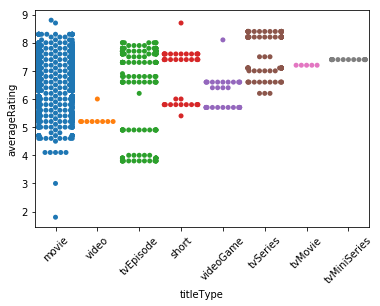

In [139]:
sns.swarmplot(x="titleType", y='averageRating', data = df_imdb_sf)
plt.xticks(rotation=45)
plt.show()

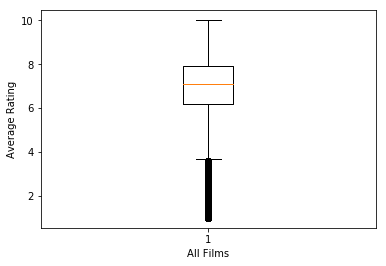

In [91]:
_ = plt.boxplot(dfimdb["averageRating"])
plt.xlabel('All Films')
plt.ylabel("Average Rating")
plt.show()

In [92]:
print(np.percentile(dfimdb["averageRating"], 25))
print(np.mean(dfimdb["averageRating"]))
print(np.percentile(dfimdb["averageRating"], 75))

6.2
6.929063902833243
7.9


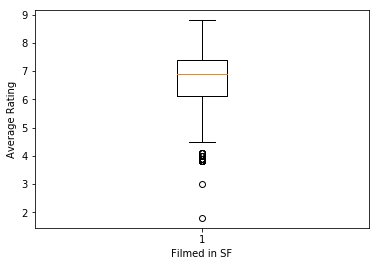

In [93]:
_ = plt.boxplot(df_imdb_sf["averageRating"])
plt.xlabel("Filmed in SF")
plt.ylabel("Average Rating")
plt.show()

In [94]:
print(np.percentile(df_imdb_sf["averageRating"], 25))
print(np.mean(df_imdb_sf["averageRating"]))
print(np.percentile(df_imdb_sf["averageRating"], 75))

6.1
6.704567474048443
7.4


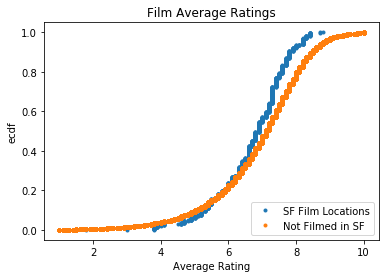

In [95]:
sf_x, sf_y = ecdf(df_imdb_sf["averageRating"])
imdb_x, imdb_y = ecdf(dfimdb["averageRating"])
_ = plt.plot(sf_x, sf_y, marker = ".", linestyle = "none")
_ = plt.plot(imdb_x, imdb_y, marker = '.', linestyle = "none")
_ = plt.xlabel("Average Rating")
_ = plt.ylabel("ecdf")
_ = plt.title("Film Average Ratings")
plt.legend(("SF Film Locations", "Not Filmed in SF"), loc = "lower right")
plt.show()

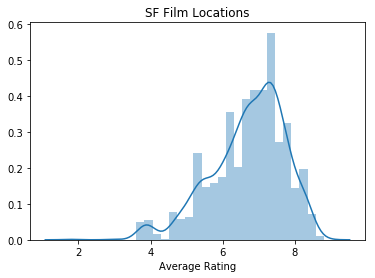

In [96]:
sns.distplot(df_imdb_sf["averageRating"])
plt.xlabel("Average Rating")
plt.title("SF Film Locations")
plt.show()

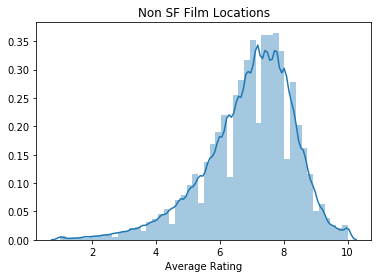

In [97]:
sns.distplot(dfimdb["averageRating"])
plt.xlabel("Average Rating")
plt.title("Non SF Film Locations")
plt.show()

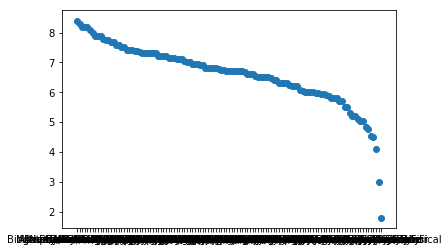

In [112]:
plt.scatter(sf_average_ratings.index, sf_average_ratings)
plt.show()

In [125]:
df_imdb_sf["titleType"].unique().size

8

In [109]:
df_imdb_sf.corr()

,averageRating,numVotes
averageRating,1.000000,0.238516
numVotes,0.238516,1.000000


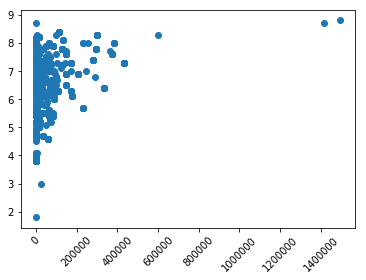

In [138]:
plt.scatter(df_imdb_sf["numVotes"], df_imdb_sf["averageRating"])
plt.xticks(rotation=45)
plt.show()

In [110]:
dfimdb.corr()

,averageRating,numVotes
averageRating,1.000000,0.012527
numVotes,0.012527,1.000000


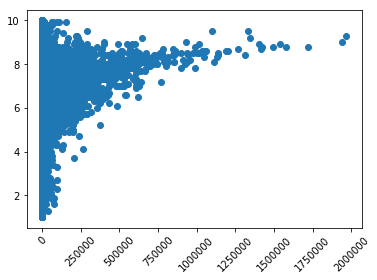

In [137]:
plt.scatter(dfimdb["numVotes"], dfimdb["averageRating"])
plt.xticks(rotation=45)
plt.show()

In [144]:
print("It looks as if SF film locations have a slightly lower average rating compared to non sf film locations. The Average rating of SF filmed media is about 6.7 where the average media of non SF filmed media is about 6.9. There is no correlation between the number of votes and the average rating that media recives. I wanted to find if there was a significant difference between ratings and film locations. From what I can see location doesnt have significant impact on ratings and the number of people who have voted also doesnt affect the outcome of the rating.")

It looks as if SF film locations have a slightly lower average rating compared to non sf film locations. The Average rating of SF filmed media is about 6.7 where the average media of non SF filmed media is about 6.9. There is no correlation between the number of votes and the average rating that media recives. I wanted to find if there was a significant difference between ratings and film locations. From what I can see location doesnt have significant impact on ratings and the number of people who have voted also doesnt affect the outcome of the rating.
